<a href="https://colab.research.google.com/github/Ruthmwaura/module_2_week_4_ip/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business understanding

**a) Specifying the Data Analytic Question**
2Q1

**b) Defining the Metric for Success**

Success will be pegged on the ability to create a model that has high accuracy on predicting if a patient have hypothyroid from their symptoms.

**c) Understanding the context **

**d) Recording the Experimental Design**

To successfully conduct this project the we will use CRISP DM, following steps will be taken in order:

-Business understanding

-Data understanding

-Data preparation

-explanatory data analysis

-modelling

-evaluation

-challenging solution

**e)Data appropriateness**

The data have variables that will adequately give answers to the analytical question.



In [48]:
#IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA   
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train=pd.read_csv('/content/train (5).csv')


#Data Understanding

In [3]:
#previewing data
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
#checking number of columns and rows
print('The dataset has '+str(train.shape[0]) + ' rows and '+ str(train.shape[1])+ ' columns')

The dataset has 891 rows and 12 columns


In [6]:
#checking the datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


cabin has very many missing values. Age hasmissing values too.

all columns are in the right data types

In [7]:
#statistical description
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Data preparation

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##validity

we will drop the columns that will not be used; passengerId,cabin, ticket,name,fare

In [9]:
#dropping the columns
train.drop(['PassengerId','Ticket', 'Name','Fare', 'Cabin'],axis=1,inplace=True)

##accuracy

we will assume that the data provided is accurate

##consistency

we will look for duplicates

In [10]:
train.duplicated().any()

True

In [11]:
#dropping the duplicates
train.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

##completeness

we will check for null values

In [12]:
#checking for null values
train.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         43
SibSp        0
Parch        0
Embarked     2
dtype: int64

In [13]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
#grouping the data by gender and filling the null values in age with mean of each gender
train.Age = train.groupby('Sex')['Age'].apply(lambda x: x.fillna(x.mean()))

In [15]:
#filling the embarked column with the mode
train = train.fillna(train['Embarked'].value_counts().index[0])

In [16]:
#confirming there are no null values 
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

##uniformity

we will check for outliers and anomalies.

In [17]:
#we will use the statistical description to check for outliers
# we will compare the mean, max and min
train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,585.000000,585.000000,585.000000,585.000000,585.000000
mean,0.471795,2.169231,30.073363,0.666667,0.552137
std,0.499631,0.852320,15.023739,1.091687,0.927749
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000
50%,0.000000,2.000000,29.000000,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


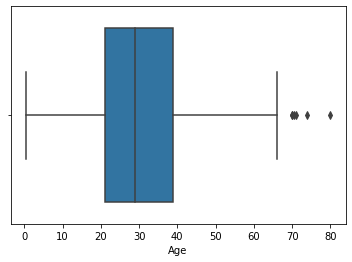

In [18]:
#we will do a box plot for age

sns.boxplot(x=train['Age'])

In [19]:
df=train[train['Age']>70]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
96,0,1,male,71.0,0,0,C
116,0,3,male,70.5,0,0,Q
630,1,1,male,80.0,0,0,S
851,0,3,male,74.0,0,0,S


we will drop these columns

In [20]:
train.drop(train[train['Age'] > 70].index, inplace = True)

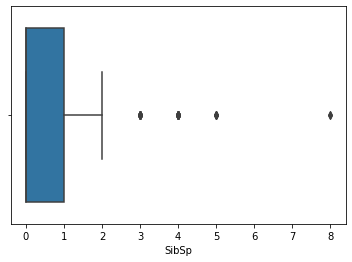

In [21]:
#we will do a box plot for SibSp	

sns.boxplot(x=train['SibSp'])

In [22]:
df1=train[train['SibSp']>2]
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
7,0,3,male,2.000000,3,1,S
16,0,3,male,2.000000,4,1,Q
24,0,3,female,8.000000,3,1,S
27,0,1,male,19.000000,3,2,S
50,0,3,male,7.000000,4,1,S
59,0,3,male,11.000000,5,2,S
63,0,3,male,4.000000,3,2,S
68,1,3,female,17.000000,4,2,S
71,0,3,female,16.000000,5,2,S
85,1,3,female,33.000000,3,0,S


the records are too many we will not drop them

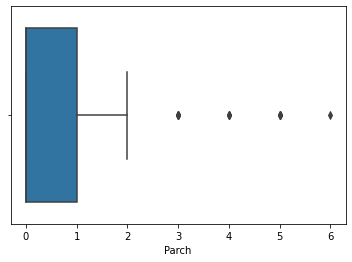

In [23]:
#we will do a box plot for Parch	

sns.boxplot(x=train['Parch'])

In [24]:
df2=train[train['Parch']>1]
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
8,1,3,female,27.000000,0,2,S
13,0,3,male,39.000000,1,5,S
25,1,3,female,38.000000,1,5,S
27,0,1,male,19.000000,3,2,S
43,1,2,female,3.000000,1,2,C
...,...,...,...,...,...,...,...
827,1,2,male,1.000000,0,2,C
850,0,3,male,4.000000,4,2,S
858,1,3,female,24.000000,0,3,C
885,0,3,female,39.000000,0,5,Q


these record too are many compared to the total number of records in the data.

In [25]:
train.shape

(581, 7)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  581 non-null    int64  
 1   Pclass    581 non-null    int64  
 2   Sex       581 non-null    object 
 3   Age       581 non-null    float64
 4   SibSp     581 non-null    int64  
 5   Parch     581 non-null    int64  
 6   Embarked  581 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 36.3+ KB


In [27]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


#Analysis


##univariate

Text(0, 0.5, 'Counts')

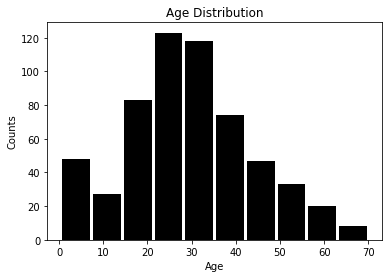

In [28]:
#age distribution
size, scale = 20, 20
data= train['Age']

data.plot.hist( bins=10, rwidth=0.9,
                   color='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')


most people are between the age 20-35

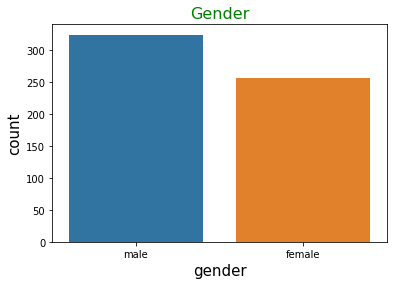

In [29]:
#Gender
sns.countplot('Sex',data = train)
plt.xlabel("gender",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Gender",fontsize=16,color="green")
plt.show()

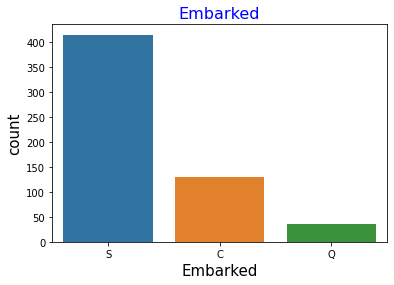

In [30]:
#Embarked
sns.countplot('Embarked',data = train)
plt.xlabel("Embarked",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Embarked",fontsize=16,color="blue")
plt.show()

In [31]:
#visualizing those survival
train['Survived'].value_counts()

0    306
1    275
Name: Survived, dtype: int64

more than half of the passengers did not survive

In [32]:
#Pclass	
train['Pclass'].value_counts()

3    268
1    169
2    144
Name: Pclass, dtype: int64

most passengers were in class 3

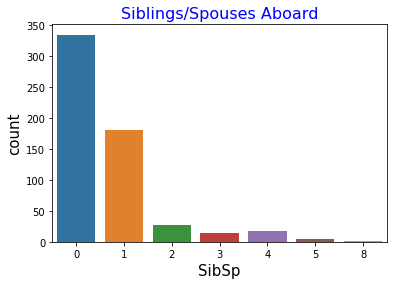

In [33]:
#visualizing Number of Siblings/Spouses Aboard
sns.countplot('SibSp',data = train)
plt.xlabel("SibSp",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Siblings/Spouses Aboard",fontsize=16,color="blue")
plt.show()

most people had no sibling or spouse aboard

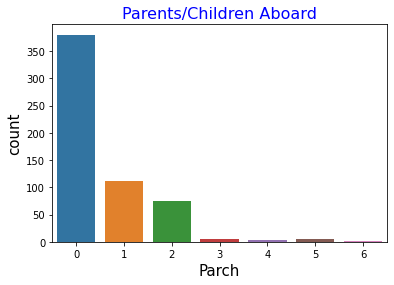

In [34]:
#visualizing Number of Parents/Children Aboard
sns.countplot('Parch',data = train)
plt.xlabel("Parch",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Parents/Children Aboard",fontsize=16,color="blue")
plt.show()

most people also had no Parent or children onboard

##Bivariate

In [35]:
#encoding the gender and embarked columns
le= preprocessing.LabelEncoder()

columns = ['Sex','Embarked']

# Encode Categorical Columns

train[columns] = train[columns].apply(le.fit_transform)

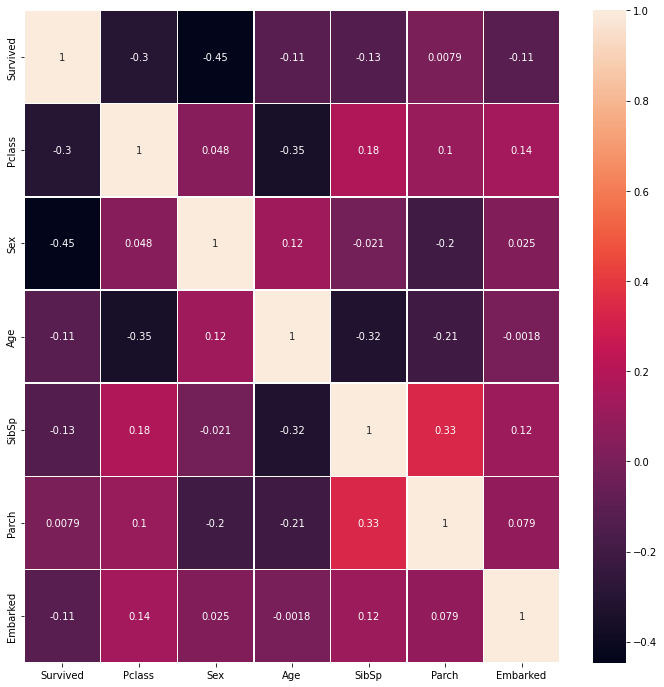

In [36]:
#visualizing the correlation between the variables
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train.corr(), xticklabels = train.corr().columns, yticklabels = train.corr().columns, annot=True,linewidths=.5, ax=ax);

Using a threshold of 0.5, we observe that:

the passenger class has a weak correlation with age and survival.

also number of siblings/spouse aboard has a weak correlattion with age and number of parent/chidren aboard, this is an indication that there are those people who were travelling as a family.

the gender also has a weak negative correlation with the survival, meaning there is a gender that was likely to survive.

the other variables has very weak or no correlation.

In [37]:
#multicolinearity of the independent variables
#using correlations to compute the VIF score for each variable
independent=train.drop(['Survived'], axis=1)
correlations=independent.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,Pclass,Sex,Age,SibSp,Parch,Embarked
Pclass,1.183027,-0.108794,0.405675,-0.054421,-0.027098,-0.158480
Sex,-0.108794,1.065391,-0.146864,-0.076561,0.218699,-0.019763
Age,0.405675,-0.146864,1.281064,0.312197,0.100513,-0.096662
SibSp,-0.054421,-0.076561,0.312197,1.236895,-0.349355,-0.105982
Parch,-0.027098,0.218699,0.100513,-0.349355,1.188185,-0.054514
Embarked,-0.158480,-0.019763,-0.096662,-0.105982,-0.054514,1.039780


there is no variable with a vif score of above 5, this means there is no multi-colinearity between the variables.

##multivariate


In [38]:
#splitting target and independent variables
X = train.drop('Survived', 1).values
y = train['Survived']

#splitting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

train_features = X

model = PCA(n_components=6).fit(train_features)

#number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on each component

most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['Pclass','Sex','Age','SibSp','Parch','Embarked']


most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

#dataframe
df1 = pd.DataFrame(dic.items())
df1

,0,1
0,PC0,Age
1,PC1,SibSp
2,PC2,Embarked
3,PC3,Parch
4,PC4,Pclass
5,PC5,Sex


#K-nearest neighbor classification

##80-20

In [39]:
#splitting target and independent variables
X = train.drop('Survived', 1)
y = train['Survived']

#splitting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#feature Scaling  
   
sc= StandardScaler()    
X_train= sc.fit_transform(X_train)    
X_test= sc.transform(X_test)  

#defining the model 

classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  

#training the model
classifier.fit(X_train, y_train) 


KNeighborsClassifier(n_neighbors=10)

In [40]:
#making predictions
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
736,0,1
452,0,1
638,0,0
592,0,0
53,1,1


In [41]:
#evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52 10]
 [19 36]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        62
           1       0.78      0.65      0.71        55

    accuracy                           0.75       117
   macro avg       0.76      0.75      0.75       117
weighted avg       0.76      0.75      0.75       117



from the matrix our model was able to correctly classify 44 positive and 39 negatives.

the wrongly classified were 18 positives and 16 negatives.

the accuracy is 71%

##70-30

In [42]:
#splitting target and independent variables
X1 = train.drop('Survived', 1)
y1 = train['Survived']

#splitting the data into test and train set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#feature Scaling  
   
sc= StandardScaler()    
X1_train= sc.fit_transform(X1_train)    
X1_test= sc.transform(X1_test)  

#defining the model 

classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  

#training the model
classifier.fit(X1_train, y1_train) 

KNeighborsClassifier(n_neighbors=10)

In [43]:
#making predictions
y1_pred = classifier.predict(X1_test)

comparison_frame = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})

comparison_frame.head(5)

,Actual,Predicted
736,0,1
452,0,0
638,0,0
592,0,0
53,1,1


In [44]:
#evaluating the model

print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

[[83  7]
 [28 57]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        90
           1       0.89      0.67      0.77        85

    accuracy                           0.80       175
   macro avg       0.82      0.80      0.80       175
weighted avg       0.82      0.80      0.80       175



##60-40

In [45]:
#splitting target and independent variables
X2 = train.drop('Survived', 1)
y2 = train['Survived']

#splitting the data into test and train set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#feature Scaling  
   
sc= StandardScaler()    
X2_train= sc.fit_transform(X2_train)    
X2_test= sc.transform(X2_test)  

#defining the model 

classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  

#training the model
classifier.fit(X2_train, y2_train) 

KNeighborsClassifier(n_neighbors=10)

In [46]:
#making predictions
y2_pred = classifier.predict(X2_test)

comparison_frame = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})

comparison_frame.head(5)

,Actual,Predicted
736,0,1
452,0,0
638,0,0
592,0,0
53,1,1


In [47]:
#evaluating the model

print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

[[83  7]
 [28 57]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        90
           1       0.89      0.67      0.77        85

    accuracy                           0.80       175
   macro avg       0.82      0.80      0.80       175
weighted avg       0.82      0.80      0.80       175



by increasing the test set percentage the accuracy increased. also the matrix shows the model classified more values correctly while the test size was increased. 

##Optimization

In [52]:
#Performing LDA
#splitting target and independent variables
X = train.drop('Survived', 1)
y = train['Survived']

#splitting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#feature Scaling  
   
sc= StandardScaler()    
X_train= sc.fit_transform(X_train)    
X_test= sc.transform(X_test)  

#performing the lda
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#defining the model 

classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  

#training the model
classifier.fit(X_train, y_train) 


KNeighborsClassifier(n_neighbors=10)

In [53]:
#making predictions
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
736,0,0
452,0,1
638,0,0
592,0,0
53,1,1


In [54]:
#evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49 13]
 [24 31]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.73        62
           1       0.70      0.56      0.63        55

    accuracy                           0.68       117
   macro avg       0.69      0.68      0.68       117
weighted avg       0.69      0.68      0.68       117



the LDA optimization is meant to  eliminate redundancy and reduce the possibility of the model overfitting and thereby including results that do not belong.

the accuracy reduced when LDA was performed. less values were correctly classified.